## HW5. Cluster Dynamic Analysis Profiles

### Data Preprocessing

In [0]:
import os

class Hooklog(object):
  filepathname = None
  par = None
  
  digitname = None
  length = None
  li = None

  def __init__(self, filepathname, par = False):
    self.filepathname = filepathname
    self.par = par
    self.li = list()
    self.length = 0
    
    assert filepathname != ""
    self._parseDigitName()
    self._parseHooklog()
  
  def __len__(self):
    return self.length
  
  def __iter__(self):
    return iter(self.li)
  
  def __str__(self):
    return "class Hooklog: %s, par = %s, len = %d, digit name = %s" % (self.filepathname, self.par, self.length, self.digitname)
  
  def _parseDigitName(self):
    self.digitname = self.filepathname.split('/')[-1][0:6] + '-' + self.filepathname.split('_')[-1].split('.')[0]
    
  def _parseHooklog(self):
    if os.path.isfile(self.filepathname):
      handle = open(self.filepathname, "rb")
      
      while True:
        tick, api, pars = self._getNextPair(handle)
        if tick == 0:
          break
        if self.par:
          self.li.append((tick, api, pars))
        else:
          self.li.append((tick, api))
        self.length += 1
      if handle:
        handle.close()
        
      self.li.sort(key = lambda tup: tup[0]) # sort by tick
      
    else:
      print("file not exist!")
      raise
      
  def _getNextPair(self, handle):
    tick = 0
    api = ''
    pars = None
    
    while True:
      line = handle.readline().decode("windows-1252")
      if not line:
        break # eof
      if line[0] == '#': # a new call
        tick = line[1:].strip()
        api = handle.readline().decode("windows-1252").strip() # next line
        api = api[1:] if api[0] == '=' else api # remove '='
        
        if self.par == True:
          pars = self._getParValue(api, handle)
        break
      else:
        continue
    return tick, api, pars
  
  def _getParValue(self, api, handle):
    firstpar = handle.readline().decode("windows-1252").strip()
    return firstpar
  
  def getAPISet(self, gram = 1):
    _set = set()
    for i in range(self.length - gram + 1):
      key = ''
      for g in range(gram):
        key += self.li[i+g][1] # api
      _set.add(key)
    return _set

In [2]:
!wget https://drive.google.com/uc?id=1eRrHOWKBp1H8ozvK9sOrTS2QvZSNEBot -O hooklogs419.zip

--2020-04-18 09:17:06--  https://drive.google.com/uc?id=1eRrHOWKBp1H8ozvK9sOrTS2QvZSNEBot
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.101, 74.125.142.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dbg0gbgqbssurbk527nmp72i0t8o7a1j/1587201375000/01461113603099005024/*/1eRrHOWKBp1H8ozvK9sOrTS2QvZSNEBot [following]
--2020-04-18 09:17:16--  https://doc-0o-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dbg0gbgqbssurbk527nmp72i0t8o7a1j/1587201375000/01461113603099005024/*/1eRrHOWKBp1H8ozvK9sOrTS2QvZSNEBot
Resolving doc-0o-3s-docs.googleusercontent.com (doc-0o-3s-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0o-3s-docs.googleusercontent.com (doc-0o-3s-docs.googleusercontent.com)|74.125

In [3]:
!unzip hooklogs419.zip

Archive:  hooklogs419.zip
replace hooklogs419/0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: hooklogs419/0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog  
  inflating: hooklogs419/0278192ce1aa7f8c4ae746eae73e6475_1484.trace.hooklog  
  inflating: hooklogs419/02c27a2e4c215d22fabdfc7b46fd6f20_1536.trace.hooklog  
  inflating: hooklogs419/02fbfeafd096088a56f6ffb9_1380.trace.hooklog  
  inflating: hooklogs419/03ae42959b733f11a168e268_1264.trace.hooklog  
  inflating: hooklogs419/03ae42959b733f11a168e268_1332.trace.hooklog  
  inflating: hooklogs419/03c009b451e012002513513a5d7e1b00_1280.trace.hooklog  
  inflating: hooklogs419/03c009b451e012002513513a5d7e1b00_604.trace.hooklog  
  inflating: hooklogs419/043121379d4a5f0f227d74ef0336428c_1636.trace.hooklog  
  inflating: hooklogs419/060c18ffe4b4f8b47c90a2339533d622_1568.trace.hooklog  
  inflating: hooklogs419/0776c66dfed69d4ea0b60d1c_1504.trace.hooklog  
  inflating: hooklogs419/

In [0]:
import os

hl_list = []
sn_list = [] # short name

for dirPath, dirNames, fileNames in os.walk("/content/hooklogs419/"):
  for fileName in fileNames:
    filenamepath = os.path.join(dirPath, fileName)
    try:
      hl = Hooklog(filenamepath)
      hl_list.append(hl)
      sn_list.append(hl.digitname)
    except:
      print("Error:", filenamepath)

### One-gram

In [0]:
APISet = set()
for hl in hl_list:
  APISet = APISet.union(hl.getAPISet(gram = 1))
APISet_li = list(APISet)

In [6]:
APIDict = {i:api for i,api in list(enumerate(APISet_li))}
APIDict.update( {api:i for i,api in list(enumerate(APISet_li))} )
APIDict

{0: 'CreateFile',
 1: 'DeleteFile',
 10: 'RegSetValue',
 11: 'CopyFile',
 12: 'OpenProcess',
 2: 'RegDeleteKey',
 3: 'LoadLibrary',
 4: 'CreateProcess',
 5: 'RegQueryValue',
 6: 'ExitProcess',
 7: 'RegEnumValue',
 8: 'CreateProcessInternal',
 9: 'RegCreateKey',
 'CopyFile': 11,
 'CreateFile': 0,
 'CreateProcess': 4,
 'CreateProcessInternal': 8,
 'DeleteFile': 1,
 'ExitProcess': 6,
 'LoadLibrary': 3,
 'OpenProcess': 12,
 'RegCreateKey': 9,
 'RegDeleteKey': 2,
 'RegEnumValue': 7,
 'RegQueryValue': 5,
 'RegSetValue': 10}

In [7]:
onehot_hl_li = []

for hl in hl_list:
  onehot_api_li = [0]*(len(APIDict)//2)
  for t, api in hl:
    onehot_api_li[APIDict[api]] = 1
  onehot_hl_li.append(onehot_api_li)

print(len(onehot_hl_li))

419


In [8]:
import pandas as pd
import numpy as np

df = pd.DataFrame(onehot_hl_li, columns=APISet_li, index=sn_list)
df.head()

,CreateFile,DeleteFile,RegDeleteKey,LoadLibrary,CreateProcess,RegQueryValue,ExitProcess,RegEnumValue,CreateProcessInternal,RegCreateKey,RegSetValue,CopyFile,OpenProcess
17d909-1420,1,0,1,1,1,1,0,1,1,1,1,0,0
93d7df-1136,1,0,1,1,0,1,0,1,0,1,1,0,0
0f561e-1376,1,0,1,1,0,1,0,1,0,1,1,0,0
2272d0-1532,1,0,1,1,0,1,0,1,0,1,1,0,0
79a958-1388,0,0,0,1,1,1,1,0,1,0,0,0,0


In [9]:
df.sum()

CreateFile               402
DeleteFile               122
RegDeleteKey             136
LoadLibrary              406
CreateProcess            127
RegQueryValue            415
ExitProcess              105
RegEnumValue             160
CreateProcessInternal    140
RegCreateKey             322
RegSetValue              222
CopyFile                  23
OpenProcess               60
dtype: int64

#### PCA clustering

explained variance ratio: [0.35332966 0.24392064]
These two principle components have explained about 59.73 % total variance


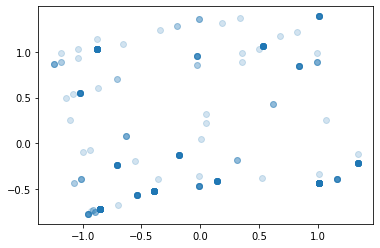

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = np.array(onehot_hl_li)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

print("These two principle components have explained about {} % total variance"
        .format(round(sum(pca.explained_variance_ratio_)*100, 2)))

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.2)
plt.show()

#### Hierarchy and KMeans clustering

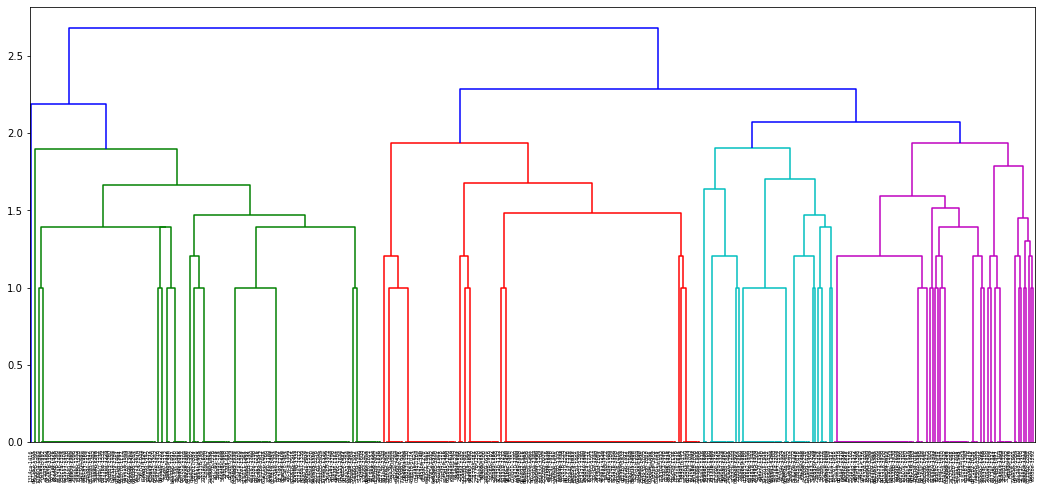

In [11]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(18,8))

X = np.array(onehot_hl_li)
Z = sch.linkage(X, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top', color_threshold=2)

plt.show()

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans_df = pd.DataFrame({"class": kmeans.labels_})
kmeans_df.index = df.index
kmeans_df.head(10) # 前十筆資料的分群結果

,class
17d909-1420,1
93d7df-1136,2
0f561e-1376,2
2272d0-1532,2
79a958-1388,3
f9449d-1948,2
32a20d-1304,0
50ba51-1256,0
2ab814-1420,0
84e53d-1364,3


### Two-gram

In [0]:
APISet = set()
for hl in hl_list:
  APISet = APISet.union(hl.getAPISet(gram = 2)) # two-gram -> gram=2
APISet_li = list(APISet)

In [15]:
APIDict = {i:api for i,api in list(enumerate(APISet_li))}
APIDict.update( {api:i for i,api in list(enumerate(APISet_li))} )
APIDict

{0: 'CopyFileCreateProcessInternal',
 1: 'LoadLibraryRegEnumValue',
 10: 'RegEnumValueRegQueryValue',
 11: 'LoadLibraryRegDeleteKey',
 12: 'CreateProcessInternalLoadLibrary',
 13: 'RegSetValueCreateProcessInternal',
 14: 'RegQueryValueCreateProcessInternal',
 15: 'LoadLibraryLoadLibrary',
 16: 'DeleteFileCreateFile',
 17: 'RegQueryValueRegEnumValue',
 18: 'RegEnumValueLoadLibrary',
 19: 'RegDeleteKeyRegSetValue',
 2: 'CreateFileCreateFile',
 20: 'RegCreateKeyRegDeleteKey',
 21: 'RegCreateKeyExitProcess',
 22: 'RegCreateKeyCreateFile',
 23: 'RegQueryValueLoadLibrary',
 24: 'CreateFileOpenProcess',
 25: 'LoadLibraryCreateFile',
 26: 'CreateFileRegDeleteKey',
 27: 'LoadLibraryExitProcess',
 28: 'CopyFileDeleteFile',
 29: 'CreateFileRegEnumValue',
 3: 'CreateFileCreateProcessInternal',
 30: 'RegDeleteKeyRegCreateKey',
 31: 'RegSetValueCreateFile',
 32: 'RegCreateKeyRegCreateKey',
 33: 'DeleteFileLoadLibrary',
 34: 'CreateFileExitProcess',
 35: 'CreateProcessCreateFile',
 36: 'DeleteFileExi

In [16]:
onehot_hl_li = []

for hl in hl_list:
    onehot_api_li = [0]*(len(APIDict)//2)
    pre = ""
    for i, v in enumerate(hl):
        if i == 0:
            pre = v[1]
        else:
            val = pre + v[1]
            onehot_api_li[APIDict[val]] = 1
            pre = v[1]
    onehot_hl_li.append(onehot_api_li)

print(len(onehot_hl_li))

419


In [17]:
import pandas as pd
import numpy as np

df = pd.DataFrame(onehot_hl_li, columns=APISet_li, index=sn_list)
df

,CopyFileCreateProcessInternal,LoadLibraryRegEnumValue,CreateFileCreateFile,CreateFileCreateProcessInternal,RegCreateKeyRegSetValue,LoadLibraryCreateProcessInternal,RegEnumValueRegEnumValue,CreateProcessInternalCreateProcessInternal,RegSetValueExitProcess,LoadLibraryRegQueryValue,RegEnumValueRegQueryValue,LoadLibraryRegDeleteKey,CreateProcessInternalLoadLibrary,RegSetValueCreateProcessInternal,RegQueryValueCreateProcessInternal,LoadLibraryLoadLibrary,DeleteFileCreateFile,RegQueryValueRegEnumValue,RegEnumValueLoadLibrary,RegDeleteKeyRegSetValue,RegCreateKeyRegDeleteKey,RegCreateKeyExitProcess,RegCreateKeyCreateFile,RegQueryValueLoadLibrary,CreateFileOpenProcess,LoadLibraryCreateFile,CreateFileRegDeleteKey,LoadLibraryExitProcess,CopyFileDeleteFile,CreateFileRegEnumValue,RegDeleteKeyRegCreateKey,RegSetValueCreateFile,RegCreateKeyRegCreateKey,DeleteFileLoadLibrary,CreateFileExitProcess,CreateProcessCreateFile,DeleteFileExitProcess,CreateFileRegQueryValue,RegCreateKeyCreateProcessInternal,RegDeleteKeyRegDeleteKey,...,RegQueryValueOpenProcess,RegQueryValueExitProcess,RegQueryValueCopyFile,RegCreateKeyRegEnumValue,DeleteFileCreateProcessInternal,CreateFileRegCreateKey,DeleteFileOpenProcess,CopyFileCopyFile,CreateProcessInternalCreateFile,CreateProcessRegQueryValue,CopyFileLoadLibrary,LoadLibraryDeleteFile,DeleteFileRegCreateKey,ExitProcessDeleteFile,RegCreateKeyLoadLibrary,RegDeleteKeyRegQueryValue,DeleteFileDeleteFile,RegSetValueRegSetValue,RegEnumValueRegCreateKey,CreateFileLoadLibrary,OpenProcessExitProcess,CopyFileRegCreateKey,RegSetValueRegDeleteKey,OpenProcessCreateFile,CreateProcessLoadLibrary,LoadLibraryRegSetValue,RegQueryValueCreateFile,CreateFileRegSetValue,RegSetValueDeleteFile,LoadLibraryCopyFile,CreateFileCopyFile,RegCreateKeyRegQueryValue,DeleteFileRegQueryValue,LoadLibraryRegCreateKey,CopyFileCreateFile,RegEnumValueCreateFile,RegQueryValueRegSetValue,OpenProcessRegDeleteKey,CreateFileDeleteFile,CreateProcessInternalRegQueryValue
17d909-1420,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
93d7df-1136,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
0f561e-1376,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
2272d0-1532,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
79a958-1388,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033a9-1432,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
52cd8c-1484,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1
516580-1592,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
60a92a-1444,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0


In [18]:
df.sum()

CopyFileCreateProcessInternal           1
LoadLibraryRegEnumValue                31
CreateFileCreateFile                  278
CreateFileCreateProcessInternal        32
RegCreateKeyRegSetValue               221
                                     ... 
RegEnumValueCreateFile                  2
RegQueryValueRegSetValue              193
OpenProcessRegDeleteKey                22
CreateFileDeleteFile                  109
CreateProcessInternalRegQueryValue     34
Length: 94, dtype: int64

#### PCA clustering

explained variance ratio: [0.40162533 0.11320304]
These two principle components have explained about 51.48 % total variance


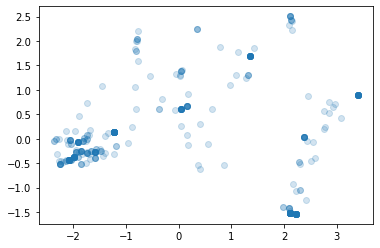

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = np.array(onehot_hl_li)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

print("These two principle components have explained about {} % total variance"
        .format(round(sum(pca.explained_variance_ratio_)*100, 2)))

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.2)
plt.show()

#### Hierarchy and KMeans clustering

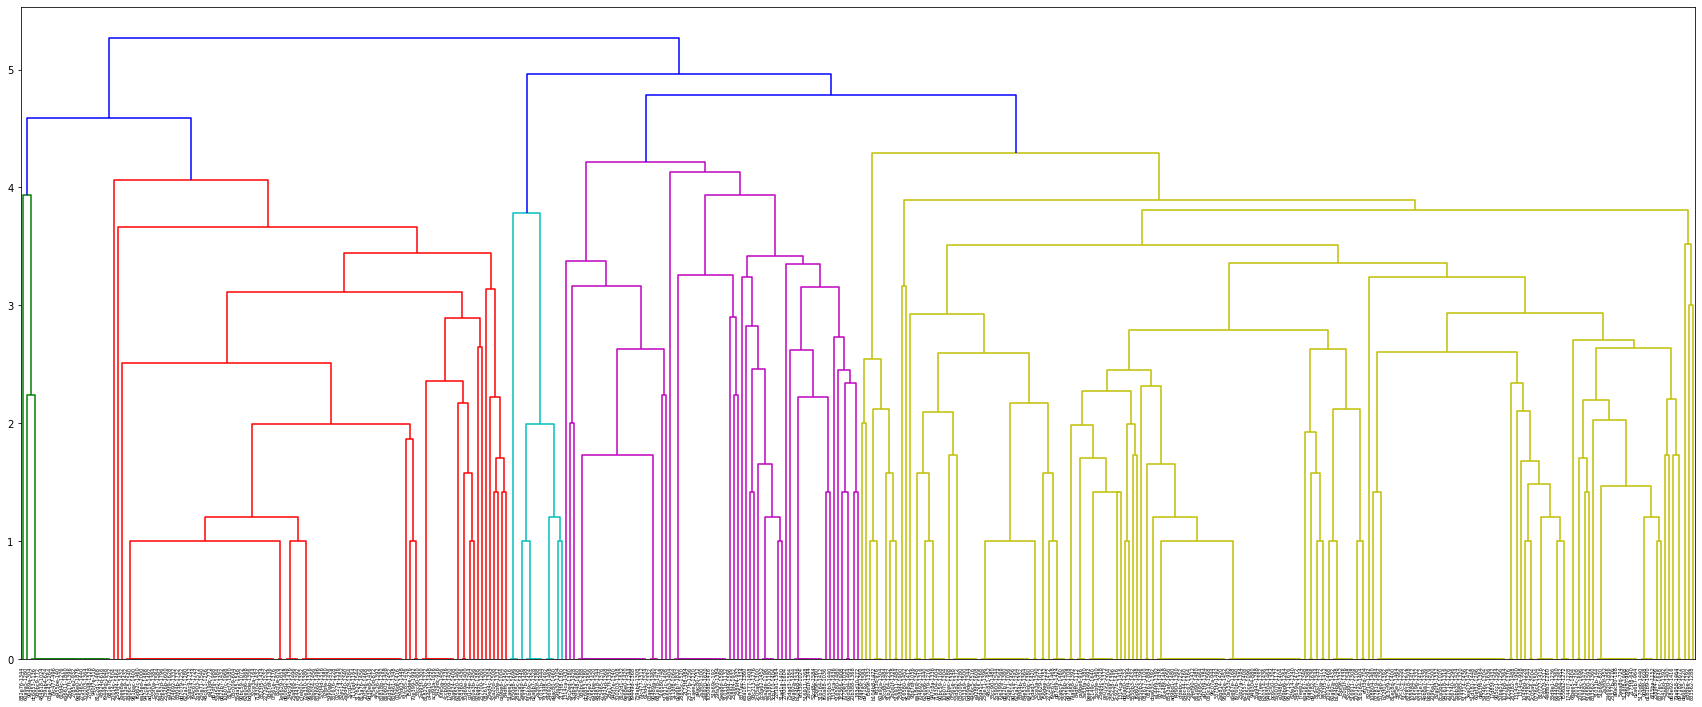

In [20]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(30,12))

X = np.array(onehot_hl_li)
Z = sch.linkage(X, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top', color_threshold=4.5)

plt.show()

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans_df = pd.DataFrame({"class":kmeans.labels_})
kmeans_df.index = df.index
kmeans_df.head(10) # 前十筆資料的分群結果

,class
17d909-1420,4
93d7df-1136,4
0f561e-1376,4
2272d0-1532,4
79a958-1388,3
f9449d-1948,0
32a20d-1304,3
50ba51-1256,2
2ab814-1420,3
84e53d-1364,3


#### Two-gram DotMatrix

In [0]:
def createDotMatrix(hl):
  n = len(hl)-1

  x = hl.li
  y = hl.li

  matched = [[0 for j in range(n)] for i in range(n)]
  pre_x, pre_y = "", "",
  for i, t_api_x in enumerate(x):
      if i != 0:
          for j, t_api_y in enumerate(y):
              if j != 0:
                  if hl.par == True:
                      api_x = pre_x + t_api_x[1] + t_api_x[2]
                      api_y = pre_y + t_api_y[1] + t_api_y[2]
                  else:
                      api_x = pre_x + t_api_x[1]
                      api_y = pre_y + t_api_y[1]
                  if api_x == api_y:
                      matched[j-1][i-1] = 1.0
              pre_y = t_api_y[1] + t_api_y[2] if hl.par else t_api_y[1]
      pre_x = t_api_x[1] + t_api_x[2] if hl.par else t_api_x[1]

  return matched

In [24]:
print("各個 hooklog 的 li 長度:")
print([len(hl.li) for hl in hl_list])

各個 hooklog 的 li 長度:
[831, 567, 567, 559, 6, 1214, 3, 72, 15, 21, 1215, 586, 70, 560, 359, 72, 1226, 420, 70, 27, 188, 10, 421, 478, 386, 135, 23, 15, 254, 4, 316, 529, 549, 419, 14, 99, 562, 27, 8, 1058, 18, 420, 27, 558, 420, 72, 9, 5, 21, 20, 549, 18, 21, 21, 9, 6, 544, 72, 11, 3, 15, 72, 879, 421, 1018, 72, 1182, 70, 254, 11, 572, 567, 15, 2, 1188, 127, 21, 11, 562, 70, 562, 236, 558, 72, 21, 222, 420, 72, 1182, 560, 559, 589, 21, 21, 589, 560, 254, 544, 562, 11, 21, 152, 544, 549, 3, 8, 567, 549, 566, 254, 21, 21, 420, 6, 826, 420, 11, 27, 229, 549, 589, 108, 1023, 127, 5, 1182, 544, 544, 8, 359, 70, 127, 420, 72, 72, 562, 72, 1026, 11, 547, 567, 98, 544, 19, 1182, 742, 589, 72, 72, 8, 72, 157, 41, 567, 419, 132, 127, 8, 58, 437, 72, 15, 544, 543, 1221, 254, 11, 544, 11, 204, 72, 725, 11, 127, 15, 72, 1182, 419, 580, 27, 11, 34, 567, 72, 72, 72, 335, 6, 1035, 547, 13, 542, 38, 15, 363, 553, 127, 420, 8, 5, 23, 21, 24, 831, 8, 72, 21, 72, 3, 4, 72, 70, 127, 204, 14, 589, 127, 548, 5

In [0]:
hl = hl_list[0]
matched = createDotMatrix(hl)

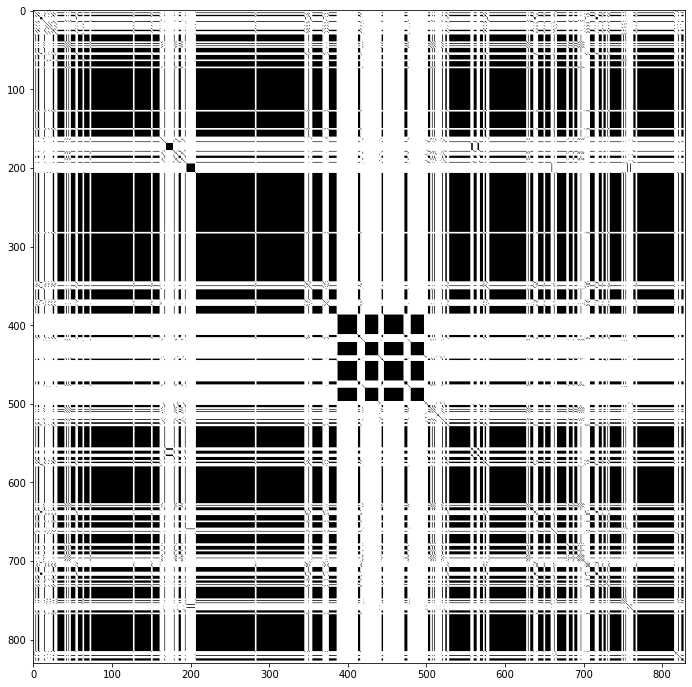

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(matched, cmap='Greys')
plt.show()

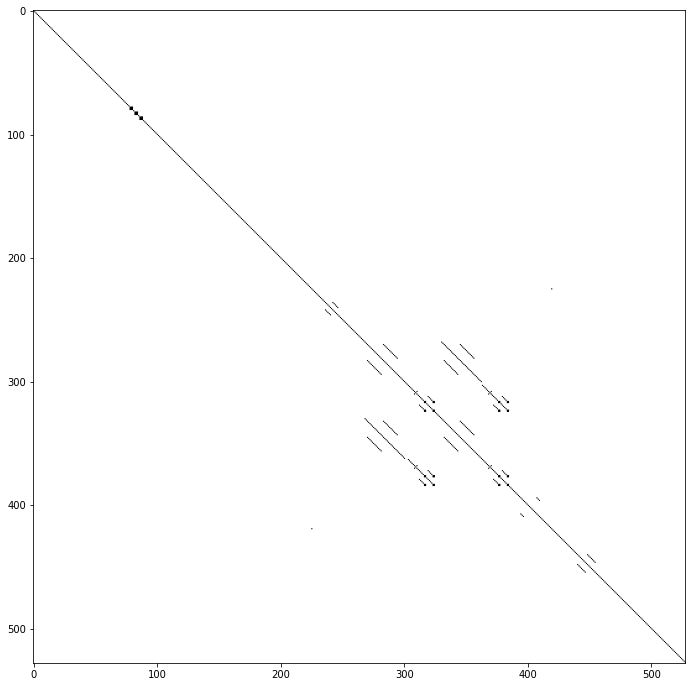

In [27]:
# parametered hooklog

par_hl = Hooklog("/content/hooklogs419/0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog", True)
matched = createDotMatrix(par_hl)

plt.figure(figsize=(12,12))
plt.imshow(matched, cmap='Greys')
plt.show()

In [0]:
# Two hooklogs

def createPairDotMatrix(h1, h2):
  n = len(h1)-1
  m = len(h2)-1

  x = h1.li
  y = h2.li

  matched = [[0 for j in range(n)] for i in range(m)]
  pre_x, pre_y = "",""
  for i, t_api_x in enumerate(x):
      if i != 0:
          for j, t_api_y in enumerate(y):
              if j != 0:
                  if h1.par == True and h2.par == True:
                      api_x = pre_x + t_api_x[1] + t_api_x[2]
                      api_y = pre_y + t_api_y[1] + t_api_y[2]
                  else:
                      api_x = pre_x + t_api_x[1]
                      api_y = pre_y + t_api_y[1]
                  if api_x == api_y:
                      matched[j-1][i-1] = 1.0
              pre_y = t_api_y[1] + t_api_y[2] if hl.par and h2.par else t_api_y[1]
      pre_x = t_api_x[1] + t_api_x[2] if hl.par and h2.par else t_api_x[1]

  return matched

class Hooklog: /content/hooklogs419/0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog, par = True, len = 529, digit name = 0006df-1416
class Hooklog: /content/hooklogs419/0278192ce1aa7f8c4ae746eae73e6475_1484.trace.hooklog, par = True, len = 72, digit name = 027819-1484


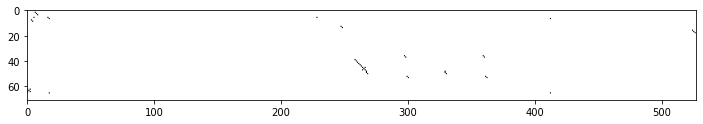

In [29]:
# two parametered hooklog

par_h1 = Hooklog("/content/hooklogs419/0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog", True)
par_h2 = Hooklog("/content/hooklogs419/0278192ce1aa7f8c4ae746eae73e6475_1484.trace.hooklog", True)
print(par_h1)
print(par_h2)

pair_matched = createPairDotMatrix(par_h1, par_h2)

plt.figure(figsize=(12,12))
plt.imshow(pair_matched, cmap='Greys')
plt.show()